# Comparazioni

In [1]:
import numpy as np
import pandas as pd
import shutil
import seaborn as sns
import os
import matplotlib.dates as dates
from pathlib import Path, PosixPath
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib qt
#%matplotlib notebook
sns.set()

In [2]:
# Per rimuovere la griglia dal grafico
# sns.set_style("white")

## Download data

## Read data

In [3]:
# Nazionale
country_df = pd.read_csv('./COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv', index_col='data', parse_dates=True)

In [4]:
# Regionale
region_df = pd.read_csv('./COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv', index_col='data', parse_dates=True)
group = region_df.groupby('denominazione_regione')['denominazione_regione'].count()

piemonte_df = region_df.loc[region_df['denominazione_regione'] == 'Piemonte']
lombardia_df = region_df.loc[region_df['denominazione_regione'] == 'Lombardia']
emilia_df = region_df.loc[region_df['denominazione_regione'] == 'Emilia-Romagna']

In [5]:
country_df.drop(['stato', 'note_it', 'note_en'], axis=1, inplace=True)
piemonte_df.drop(['stato', 'note_it', 'note_en'], axis=1, inplace=True)
lombardia_df.drop(['stato', 'note_it', 'note_en'], axis=1, inplace=True)
emilia_df.drop(['stato', 'note_it', 'note_en'], axis=1, inplace=True)

/Users/marcocaldera/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
country_df.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
data,,,,,,,,,,,,
2020-05-06 17:00:00,15769,1333,17102,74426,91528,-6939,1444,93245,29684,214457,2310929,1549892.0
2020-05-07 17:00:00,15174,1311,16485,73139,89624,-1904,1401,96276,29958,215858,2381288,1563557.0
2020-05-08 17:00:00,14636,1168,15804,72157,87961,-1663,1327,99023,30201,217185,2445063,1608985.0
2020-05-09 17:00:00,13834,1034,14868,69974,84842,-3119,1083,103031,30395,218268,2514234,1645076.0
2020-05-10 17:00:00,13618,1027,14645,68679,83324,-1518,802,105186,30560,219070,2565912,1676460.0


## Totale positivi

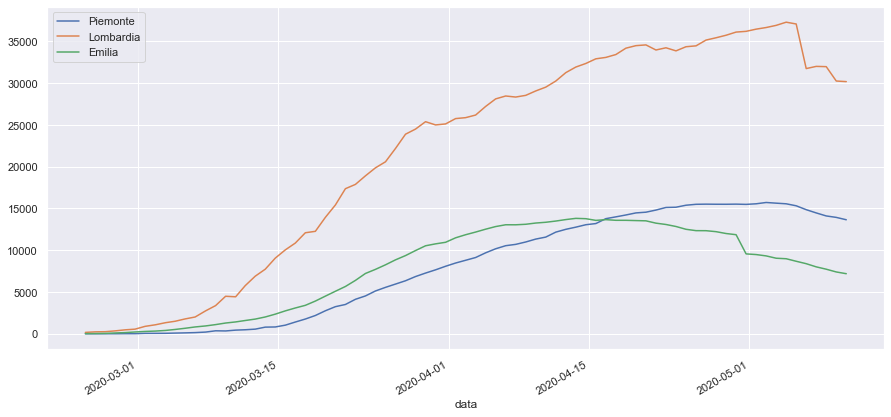

In [7]:
# country_df['totale_positivi'].plot(label='Nazione',figsize=(15,7))
piemonte_df['totale_positivi'].plot(label='Piemonte',figsize=(15,7))
lombardia_df['totale_positivi'].plot(label='Lombardia',figsize=(15,7))
emilia_df['totale_positivi'].plot(label='Emilia',figsize=(15,7))
plt.legend()

**Il numero deve andare sotto 0**

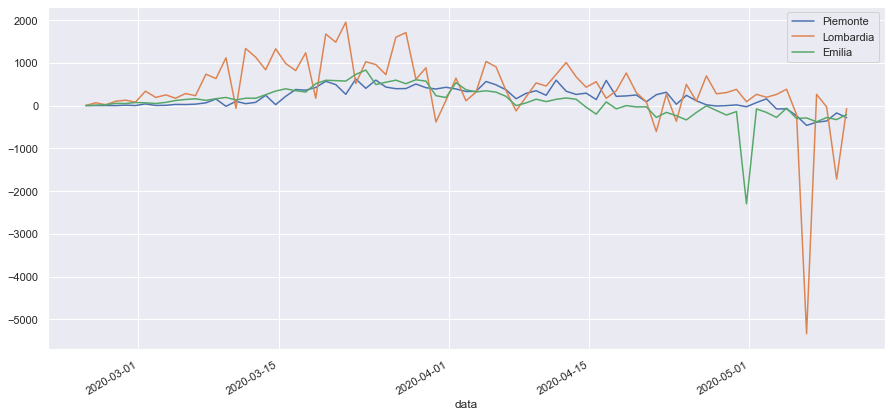

In [8]:
# country_df['variazione_totale_positivi'].plot(label='Nazione',figsize=(15,7))
piemonte_df['variazione_totale_positivi'].plot(label='Piemonte',figsize=(15,7))
lombardia_df['variazione_totale_positivi'].plot(label='Lombardia',figsize=(15,7))
emilia_df['variazione_totale_positivi'].plot(label='Emilia',figsize=(15,7))
plt.legend()

### Nuove persone positive

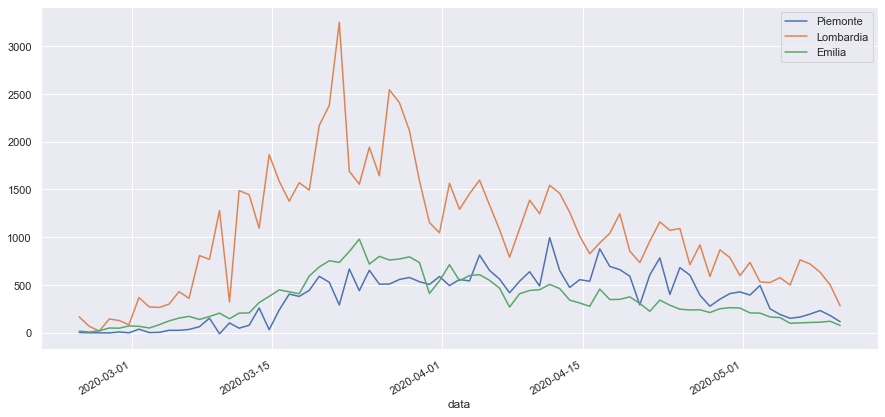

In [9]:
# country_df['nuovi_positivi'].plot(label='Nazione',figsize=(15,7))
piemonte_df['nuovi_positivi'].plot(label='Piemonte',figsize=(15,7))
lombardia_df['nuovi_positivi'].plot(label='Lombardia',figsize=(15,7))
emilia_df['nuovi_positivi'].plot(label='Emilia',figsize=(15,7))
plt.legend()

### Incremento giornaliero di tamponi

In [10]:
piemonte_df['daily_tamponi'] = piemonte_df['tamponi'] - piemonte_df['tamponi'].shift(1)
lombardia_df['daily_tamponi'] = lombardia_df['tamponi'] - lombardia_df['tamponi'].shift(1)
emilia_df['daily_tamponi'] = emilia_df['tamponi'] - emilia_df['tamponi'].shift(1)

/Users/marcocaldera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/marcocaldera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/marcocaldera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

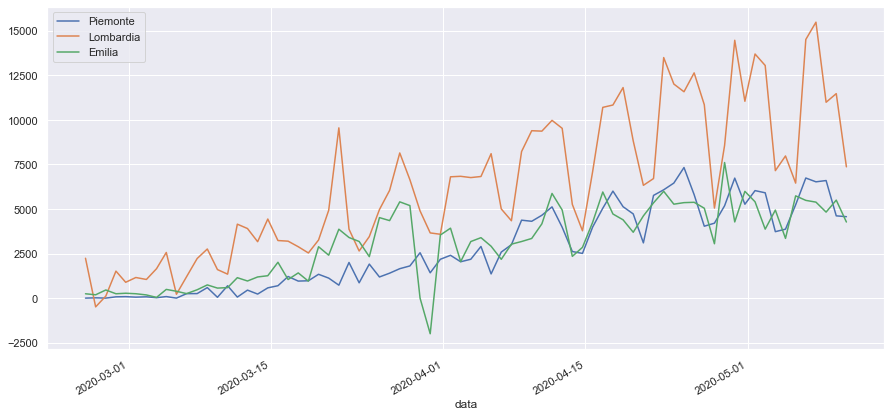

In [11]:
piemonte_df['daily_tamponi'].plot(label='Piemonte',figsize=(15,7))
lombardia_df['daily_tamponi'].plot(label='Lombardia',figsize=(15,7))
emilia_df['daily_tamponi'].plot(label='Emilia',figsize=(15,7))
plt.legend()

### Nuove persone positive normalizzato con il numero di tamponi fatti

In [12]:
piemonte_df['normed_tamponi'] = piemonte_df['nuovi_positivi'] / piemonte_df['daily_tamponi']
lombardia_df['normed_tamponi'] = lombardia_df['nuovi_positivi'] / lombardia_df['daily_tamponi']
emilia_df['normed_tamponi'] = emilia_df['nuovi_positivi'] / emilia_df['daily_tamponi']

/Users/marcocaldera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/marcocaldera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/marcocaldera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

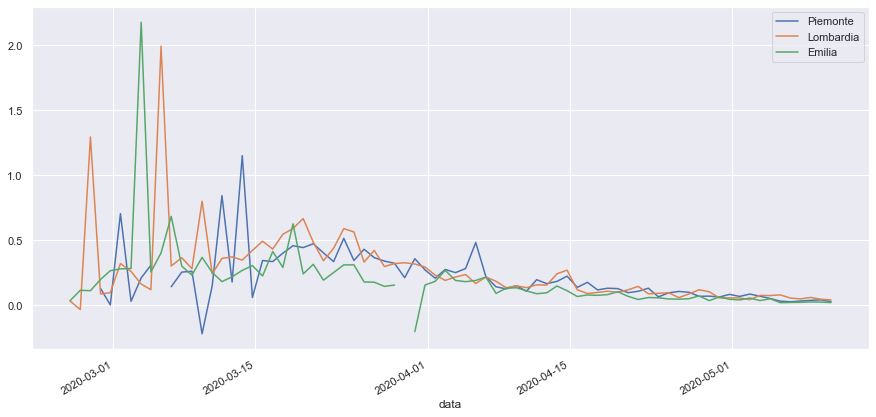

In [13]:
piemonte_df['normed_tamponi'].plot(label='Piemonte',figsize=(15,7))
lombardia_df['normed_tamponi'].plot(label='Lombardia',figsize=(15,7))
emilia_df['normed_tamponi'].plot(label='Emilia',figsize=(15,7))
plt.legend()